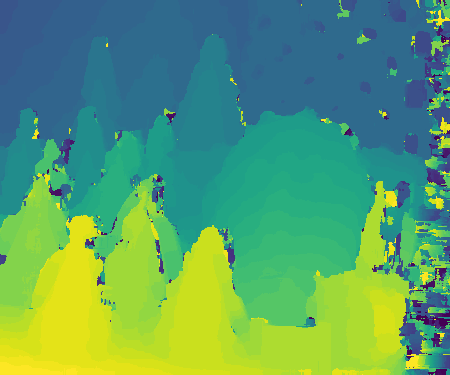

In [1]:
from PIL import Image
from pylab import *
from scipy.ndimage import *


def plane_sweep_ncc(im_l, im_r, start, steps, wid):
    # 使用归一化的互相关计算视差图像 """
    m, n = im_l.shape
    # 保存不同求和值的数组
    mean_l = zeros((m, n))
    mean_r = zeros((m, n))
    s = zeros((m, n))
    s_l = zeros((m, n))
    s_r = zeros((m, n))
    # 保存深度平面的数组
    dmaps = zeros((m, n, steps))
    # 计算图像块的平均值
    filters.uniform_filter(im_l, wid, mean_l)
    filters.uniform_filter(im_r, wid, mean_r)
    # 归一化图像
    norm_l = im_l - mean_l
    norm_r = im_r - mean_r
    # 尝试不同的视差
    for displ in range(steps):
        # 将左边图像移动到右边，计算加和
        filters.uniform_filter(roll(norm_l, -displ - start) * norm_r, wid, s)  # 和归一化
        filters.uniform_filter(roll(norm_l, -displ - start) * roll(norm_l, -displ - start), wid, s_l)
        filters.uniform_filter(norm_r * norm_r, wid, s_r)  # 和反归一化
        # 保存 ncc 的分数
        dmaps[:, :, displ] = s / sqrt(s_l * s_r)
    # 为每个像素选取最佳深度
    return argmax(dmaps, axis=2)


def plane_sweep_gauss(im_l, im_r, start, steps, wid):
    # 使用带有高斯加权周边的归一化互相关计算视差图像 """
    m, n = im_l.shape
    # 保存不同加和的数组
    mean_l = zeros((m, n))
    mean_r = zeros((m, n))
    s = zeros((m, n))
    s_l = zeros((m, n))
    s_r = zeros((m, n))
    # 保存深度平面的数组
    dmaps = zeros((m, n, steps))
    # 计算平均值
    filters.gaussian_filter(im_l, wid, 0, mean_l)
    filters.gaussian_filter(im_r, wid, 0, mean_r)
    # 归一化图像
    norm_l = im_l - mean_l
    norm_r = im_r - mean_r
    # 尝试不同的视差
    for displ in range(steps):
        # 将左边图像移动到右边，计算加和
        filters.gaussian_filter(roll(norm_l, -displ - start) * norm_r, wid, 0, s)  # 和归一化

        filters.gaussian_filter(roll(norm_l, -displ - start) * roll(norm_l, -displ - start), wid, 0, s_l)
        filters.gaussian_filter(norm_r * norm_r, wid, 0, s_r)  # 和反归一化
    # 保存 ncc 的分数
    dmaps[:, :, displ] = s / sqrt(s_l * s_r)
    # 为每个像素选取最佳深度
    return argmax(dmaps, axis=2)


im_l = array(Image.open('img/im2.png').convert('L'), 'f')
im_r = array(Image.open('img/im6.png').convert('L'), 'f')
# 开始偏移，并设置步长
steps = 50
start = 4

# ncc 的宽度
wid = 12

res = plane_sweep_ncc(im_l, im_r, start, steps, wid)

imsave('depth.png', res)

display(Image.open('depth.png'))